In [1]:
import sys
sys.path.append('/home/sardarchitect/repos/github.com/ucsd_capstone/pedtracker/')

## Steps
1. Select a video
2. Read the video and get annotations (either via model or directly from data)
3. For each bbox, store midpoint of bottom segment. Call that feet_position

In [2]:
from virat import virat
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
video_path = "/mnt/d/data/virat/videos/VIRAT_S_000002.mp4"

annotations_df = virat.get_annotations(video_path)
annotations_df.head()

,object_id,object_duration,current_frame,bbox_lefttop_x,bbox_lefttop_y,bbox_width,bbox_height,object_type
0,2,9076,0,1262,381,53,116,1
1,2,9076,1,1261,381,53,116,1
2,2,9076,2,1260,381,53,116,1
3,2,9076,3,1259,381,53,116,1
4,2,9076,4,1258,381,53,116,1


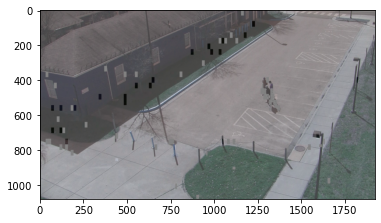

In [4]:
capture = cv.VideoCapture(video_path)       
ret, current_frame = capture.read()
plt.imshow(current_frame)

In [5]:
x = annotations_df['bbox_lefttop_x'] - (annotations_df['bbox_width'] // 2)
y = annotations_df['bbox_lefttop_y'] + (annotations_df['bbox_height'])
annotations_df['feet_pos_x'] = x
annotations_df['feet_pos_y'] = y

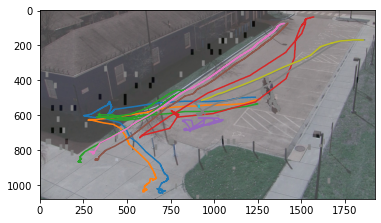

In [6]:
objects = annotations_df['object_id'].unique()
for obj in objects:
    positions = annotations_df[annotations_df['object_id'] == obj][['feet_pos_x', 'feet_pos_y']]
    plt.plot(positions['feet_pos_x'], positions['feet_pos_y'])
plt.imshow(current_frame)
plt.savefig('../assets/out.png')